In [1]:
from transport_frames.graphbuilder.graph import Graph 
from transport_frames.frame_grader.advanced_grade import AdvancedGrader
from transport_frames.framebuilder.frame import Frame
import transport_frames.utils.helper_funcs as he
from transport_frames.indicators.indicator_terr import indicator_territory
from transport_frames.indicators.indicator_area import indicator_area
from transport_frames.indicators.utils import availability_matrix, create_service_dict

/Users/sashamorozov/Documents/Code/NCCR/transport_frames/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import geopandas as gpd
import networkx as nx
import momepy
import momepy
import osmnx as ox
import geopandas as gpd
import shapely
import pandas as pd
import networkx as nx
import numpy as np
import json
from shapely.geometry import Point, LineString
from shapely import Polygon, MultiPolygon
from shapely.ops import split, unary_union, nearest_points
from shapely.geometry import GeometryCollection, MultiPoint

from transport_frames.utils.helper_funcs import convert_list_attr_from_str, prepare_graph
from transport_frames.indicators.utils import availability_matrix
from transport_frames.road_adder.road_adder import add_roads

In [3]:
region_name = 'Ленинградская область'
geocode_LO = 176095
geocode_SPb = 337422
local_crs = 32636

region_polygon = ox.geocode_to_gdf(f'R{geocode_LO}', by_osmid=True).to_crs(epsg=local_crs)
city_polygon = ox.geocode_to_gdf(f'R{geocode_SPb}', by_osmid=True).to_crs(epsg=local_crs).buffer(3000)
polygon = gpd.GeoDataFrame(
    region_polygon.union(city_polygon).to_crs(epsg=4326),
    geometry=region_polygon.union(city_polygon).to_crs(epsg=4326),
    crs = 4326
)
polygon['name'] = region_name

In [4]:
g = Graph.from_polygon(polygon, crs=local_crs)

2024-09-20 21:57:49.091 | INFO     | transport_frames.graphbuilder.graph:from_polygon:69 - Downloading the graph from OSM...
2024-09-20 21:58:51.246 | INFO     | transport_frames.graphbuilder.graph:_prepare_attrs:135 - Preparing the graph...
2024-09-20 22:00:39.169 | INFO     | transport_frames.graphbuilder.graph:_prepare_attrs:173 - Graph is ready!


In [6]:
n,e = momepy.nx_to_gdf(g.graph)

In [7]:
nu = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Добавление_дорог/citygraph_e_new_edges.geojson').to_crs(32636)

## run

In [8]:
graf = add_roads(g.graph,nu,n,e,32636,node_buffer = 300,road_buffer = 5000)

/Users/sashamorozov/Documents/Code/NCCR/transport_frames/transport_frames/road_adder/road_adder.py:111: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  added_nodes = pd.concat([added_nodes, new_end_node]) # adding ends
/Users/sashamorozov/Documents/Code/NCCR/transport_frames/transport_frames/road_adder/road_adder.py:117: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  added_edges = pd.concat([added_edges, bridge_edge]) # if we can connect end to a node, only the bridge is added
/Users/sashamorozov/D

In [5]:
graf

NameError: name 'graf' is not defined

In [9]:
regions = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/data/regions_of_russia.geojson')
regions = regions[regions['ISO3166-2']!='RU-CHU']
regions = regions[regions['geometry'].apply(lambda x: isinstance(x, (Polygon, MultiPolygon)))]

admin_centers = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/data/Ленинградская_область/Ленинградская_область_district_admin_centres_18_nodes.geojson')
admin_centers = admin_centers.rename(columns={'name188': 'name'})
admin_centers = admin_centers[['name','geometry']].reset_index()

In [10]:
f2 = Frame(graf,regions,polygon,admin_centers) # c КАД2

In [69]:
f2.frame

In [9]:
f = Frame(g.graph,regions,polygon,admin_centers) # без КАД2

In [ ]:
f.get_geopackage()

In [11]:
lo = he.convert_geometry_from_wkt(nx.read_graphml('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/graphs/Ленинградская_область/Ленинградская_область_inter.graphml'))
lo = he.convert_list_attr_from_str(lo)
lo = prepare_graph(lo)

lo.graph['crs'] = 32636

In [11]:
settlement_points = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/data/Ленинградская_область/Ленинградская_область_region_points.geojson')
settlement_polygons = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/data/Ленинградская_область/Ленинградская_область_settlement.geojson')
railway_stations = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/data/Ленинградская_область/Ленинградская_область_railway_stations.geojson')
bus_stops = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/data/Ленинградская_область/Ленинградская_область_bus_stops.geojson')
aero = gpd.read_file('/Users/sashamorozov/Documents/НЦКР платформа ЦУ/Показатели по 9 регионам/data/data/Ленинградская_область/Ленинградская_область_local_aerodrome.geojson')

In [17]:
graf.graph

{'crs': 32636, 'approach': 'primal', 'graph_type': 'car graph'}

In [18]:
g.graph.graph

{'crs': 32636, 'approach': 'primal', 'graph_type': 'car graph'}

In [13]:
g.graph.graph['crs'] = 32636

In [12]:
graf.graph['crs'] = 32636

In [15]:
# без КАД2
adj_drive = availability_matrix(g.graph, settlement_points,settlement_points,local_crs=local_crs)
adj_inter = availability_matrix(lo, settlement_points, settlement_points, local_crs=local_crs)

In [13]:
# c КАД2
adj_drive1 = availability_matrix(graf, settlement_points,settlement_points,local_crs=local_crs)
# adj_inter1 = availability_matrix(lo, settlement_points, settlement_points, local_crs=local_crs)

In [17]:
filter = ['Всеволожский муниципальный район', 'Кировский муниципальный район', 'Тосненский муниципальный район']

In [18]:
filtered_polygons = settlement_polygons[settlement_polygons['layer'].isin(filter)]

In [ ]:
settlement_polygons.explore()

In [14]:
settlement_points['connectivity_drive_min']=adj_drive1.median(axis=1)
res = gpd.sjoin(settlement_points, settlement_polygons, how="left", predicate="within")
grouped_median = res.groupby('index_right').median(numeric_only=True)

In [44]:
gdf = settlement_polygons.copy()
gdf['connectivity_drive_min'] = grouped_median['connectivity_drive_min']

In [ ]:
gdf

In [15]:
gdf1 = settlement_polygons.copy()
gdf1['connectivity_drive_min'] = grouped_median['connectivity_drive_min']

In [16]:
gdf1

,fid,name,layer,2019,2021,2022,2023,2020,status,geometry,connectivity_drive_min
0,7,Самойловское сельское поселение,Бокситогорский муниципальный район,2069,2085,2096,2154,2088,settlement,"MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...",210.133431
1,2,Большедворское сельское поселение,Бокситогорский муниципальный район,1575,1505,1486,1698,1528,settlement,"MULTIPOLYGON (((34.30682 59.71494, 34.30791 59...",187.010431
2,6,Пикалевское городское поселение,Бокситогорский муниципальный район,19981,19490,19250,20169,19746,settlement,"MULTIPOLYGON (((34.14251 59.48759, 34.13616 59...",194.130431
3,3,Борское сельское поселение,Бокситогорский муниципальный район,3312,3301,3272,3393,3279,settlement,"MULTIPOLYGON (((34.05997 59.15087, 34.06007 59...",199.582431
4,1,Бокситогорское городское поселение,Бокситогорский муниципальный район,15370,15088,14606,15960,15200,settlement,"MULTIPOLYGON (((34.06836 59.40315, 34.05535 59...",186.478431
...,...,...,...,...,...,...,...,...,...,...,...
183,185,Фёдоровское городское поселение,Тосненский муниципальный район,4460,4450,4562,6083,4536,settlement,"MULTIPOLYGON (((30.52049 59.69087, 30.52316 59...",109.985000
184,179,Нурминское сельское поселение,Тосненский муниципальный район,3127,3018,2977,3354,3090,settlement,"MULTIPOLYGON (((31.01271 59.63362, 31.01394 59...",119.944350
185,175,Красноборское городское поселение,Тосненский муниципальный район,5145,4825,4657,4507,5006,settlement,"MULTIPOLYGON (((30.58336 59.64993, 30.58367 59...",110.208500
186,183,Трубникоборское сельское поселение,Тосненский муниципальный район,1603,1541,1479,1620,1583,settlement,"MULTIPOLYGON (((31.13126 59.08942, 31.13522 59...",117.027775


In [23]:
n1,e1 = momepy.nx_to_gdf(f.frame)

In [17]:
n2,e2 = momepy.nx_to_gdf(f2.frame)

In [24]:
n1 = n1.to_crs(epsg=4326)
e1 = e1.to_crs(epsg=4326)

In [18]:
n2 = n2.to_crs(epsg=4326)
e2 = e2.to_crs(epsg=4326)

In [19]:
gdf1.to_crs(epsg=4326)

,fid,name,layer,2019,2021,2022,2023,2020,status,geometry,connectivity_drive_min
0,7,Самойловское сельское поселение,Бокситогорский муниципальный район,2069,2085,2096,2154,2088,settlement,"MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...",210.133431
1,2,Большедворское сельское поселение,Бокситогорский муниципальный район,1575,1505,1486,1698,1528,settlement,"MULTIPOLYGON (((34.30682 59.71494, 34.30791 59...",187.010431
2,6,Пикалевское городское поселение,Бокситогорский муниципальный район,19981,19490,19250,20169,19746,settlement,"MULTIPOLYGON (((34.14251 59.48759, 34.13616 59...",194.130431
3,3,Борское сельское поселение,Бокситогорский муниципальный район,3312,3301,3272,3393,3279,settlement,"MULTIPOLYGON (((34.05997 59.15087, 34.06007 59...",199.582431
4,1,Бокситогорское городское поселение,Бокситогорский муниципальный район,15370,15088,14606,15960,15200,settlement,"MULTIPOLYGON (((34.06836 59.40315, 34.05535 59...",186.478431
...,...,...,...,...,...,...,...,...,...,...,...
183,185,Фёдоровское городское поселение,Тосненский муниципальный район,4460,4450,4562,6083,4536,settlement,"MULTIPOLYGON (((30.52049 59.69087, 30.52316 59...",109.985000
184,179,Нурминское сельское поселение,Тосненский муниципальный район,3127,3018,2977,3354,3090,settlement,"MULTIPOLYGON (((31.01271 59.63362, 31.01394 59...",119.944350
185,175,Красноборское городское поселение,Тосненский муниципальный район,5145,4825,4657,4507,5006,settlement,"MULTIPOLYGON (((30.58336 59.64993, 30.58367 59...",110.208500
186,183,Трубникоборское сельское поселение,Тосненский муниципальный район,1603,1541,1479,1620,1583,settlement,"MULTIPOLYGON (((31.13126 59.08942, 31.13522 59...",117.027775


In [20]:
combined_gdf = gpd.GeoDataFrame(pd.concat([gdf1, e2, n2], ignore_index=True))

In [39]:
gdf

,fid,name,layer,2019,2021,2022,2023,2020,status,geometry,connectivity_drive_min
0,7,Самойловское сельское поселение,Бокситогорский муниципальный район,2069,2085,2096,2154,2088,settlement,"MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...",220.9920
1,2,Большедворское сельское поселение,Бокситогорский муниципальный район,1575,1505,1486,1698,1528,settlement,"MULTIPOLYGON (((34.30682 59.71494, 34.30791 59...",197.8690
2,6,Пикалевское городское поселение,Бокситогорский муниципальный район,19981,19490,19250,20169,19746,settlement,"MULTIPOLYGON (((34.14251 59.48759, 34.13616 59...",204.9890
3,3,Борское сельское поселение,Бокситогорский муниципальный район,3312,3301,3272,3393,3279,settlement,"MULTIPOLYGON (((34.05997 59.15087, 34.06007 59...",210.4410
4,1,Бокситогорское городское поселение,Бокситогорский муниципальный район,15370,15088,14606,15960,15200,settlement,"MULTIPOLYGON (((34.06836 59.40315, 34.05535 59...",197.3370
...,...,...,...,...,...,...,...,...,...,...,...
183,185,Фёдоровское городское поселение,Тосненский муниципальный район,4460,4450,4562,6083,4536,settlement,"MULTIPOLYGON (((30.52049 59.69087, 30.52316 59...",111.2180
184,179,Нурминское сельское поселение,Тосненский муниципальный район,3127,3018,2977,3354,3090,settlement,"MULTIPOLYGON (((31.01271 59.63362, 31.01394 59...",122.3930
185,175,Красноборское городское поселение,Тосненский муниципальный район,5145,4825,4657,4507,5006,settlement,"MULTIPOLYGON (((30.58336 59.64993, 30.58367 59...",111.6755
186,183,Трубникоборское сельское поселение,Тосненский муниципальный район,1603,1541,1479,1620,1583,settlement,"MULTIPOLYGON (((31.13126 59.08942, 31.13522 59...",146.3060


In [21]:
combined_gdf.drop(columns=['fid'],inplace=True)

In [ ]:
combined_gdf

In [ ]:
combined_gdf.info()

In [22]:
combined_gdf.to_file('connectivity_test_road.gpkg', driver='GPKG')

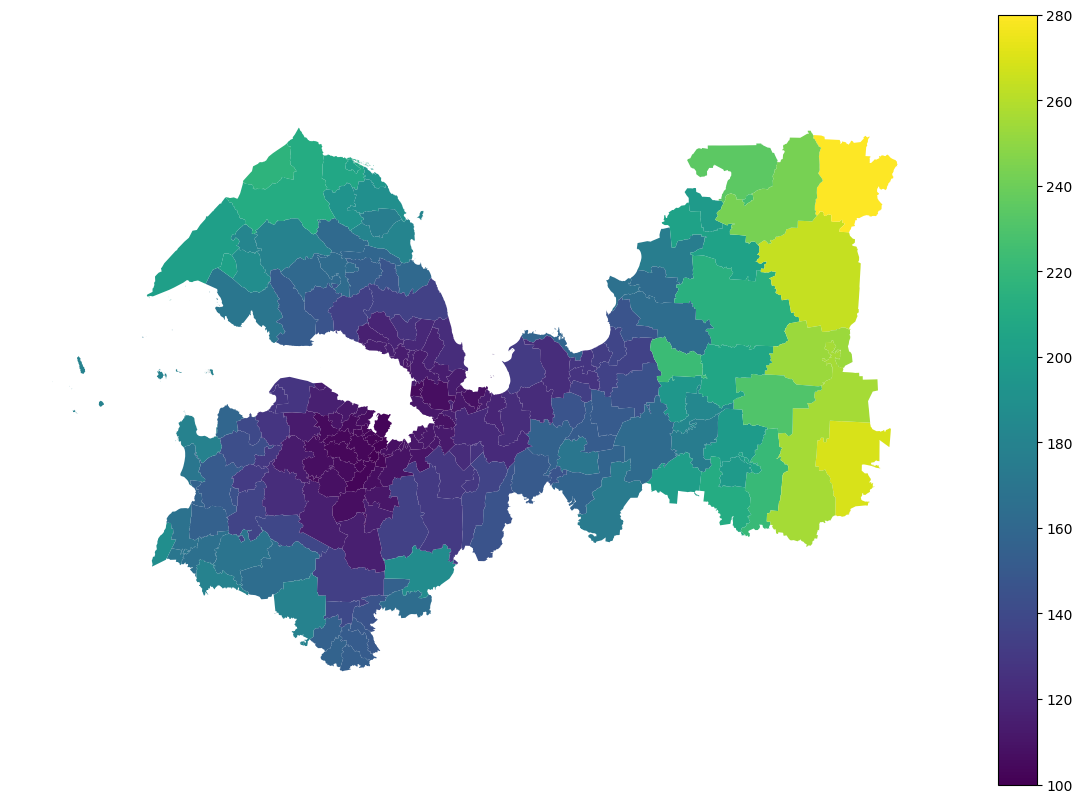

In [33]:
gdf.plot(column='connectivity_drive_min', legend=True, figsize=(15,10),vmin=100, vmax=280).set_axis_off()

In [37]:
gdf_CAD = settlement_polygons.copy()
gdf_CAD['connectivity_drive_min'] = grouped_median['connectivity_drive_min']

In [ ]:
gdf

In [ ]:
gdf1

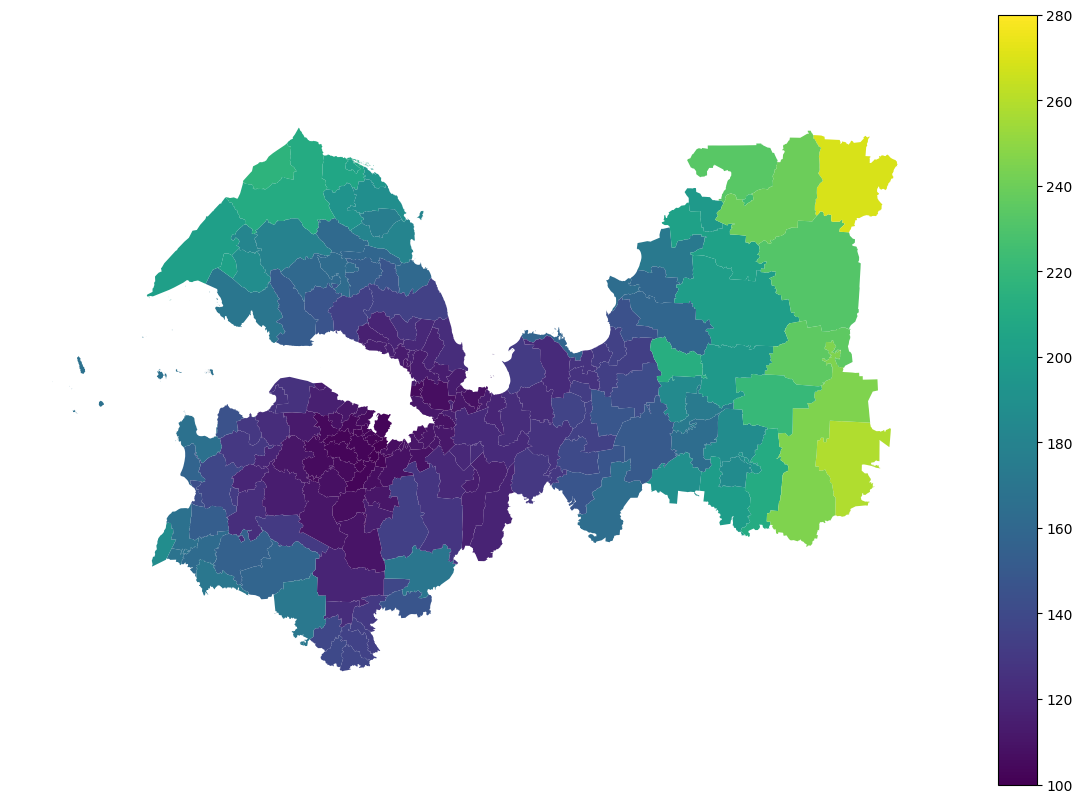

In [34]:
gdf1.plot(column='connectivity_drive_min', legend=True, figsize=(15,10),vmin=100, vmax=280).set_axis_off()

In [72]:
grouped_median

,connectivity_drive_min,fid_right
index_right,,
24.0,122.4320,105.0
25.0,131.1935,103.0
26.0,122.6160,97.0
27.0,118.4875,101.0
28.0,109.1200,98.0
29.0,115.3585,99.0
30.0,111.3150,95.0
31.0,114.4320,100.0
32.0,111.2150,104.0


In [28]:
settlement_points['connectivity_inter_min']=adj_inter.median(axis=1)
res = gpd.sjoin(settlement_points, settlement_polygons, how="left", predicate="within")
grouped_median = res.groupby('index_right').median(numeric_only=True)

In [29]:
gdf1 = settlement_polygons.copy()
gdf1['connectivity_inter_min'] = grouped_median['connectivity_inter_min']

<Axes: >

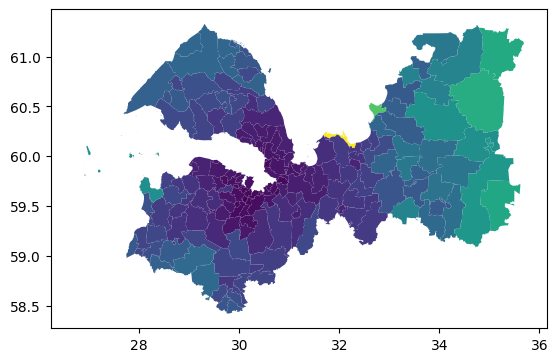

In [30]:
gdf1.plot(column='connectivity_inter_min')

In [33]:
gdf1

,fid,name,layer,2019,2021,2022,2023,2020,status,geometry,connectivity_inter_min
0,7,Самойловское сельское поселение,Бокситогорский муниципальный район,2069,2085,2096,2154,2088,settlement,"MULTIPOLYGON (((34.42169 59.68391, 34.42428 59...",306.916244
1,2,Большедворское сельское поселение,Бокситогорский муниципальный район,1575,1505,1486,1698,1528,settlement,"MULTIPOLYGON (((34.30682 59.71494, 34.30791 59...",314.392620
2,6,Пикалевское городское поселение,Бокситогорский муниципальный район,19981,19490,19250,20169,19746,settlement,"MULTIPOLYGON (((34.14251 59.48759, 34.13616 59...",267.998094
3,3,Борское сельское поселение,Бокситогорский муниципальный район,3312,3301,3272,3393,3279,settlement,"MULTIPOLYGON (((34.05997 59.15087, 34.06007 59...",295.918629
4,1,Бокситогорское городское поселение,Бокситогорский муниципальный район,15370,15088,14606,15960,15200,settlement,"MULTIPOLYGON (((34.06836 59.40315, 34.05535 59...",271.468446
...,...,...,...,...,...,...,...,...,...,...,...
183,185,Фёдоровское городское поселение,Тосненский муниципальный район,4460,4450,4562,6083,4536,settlement,"MULTIPOLYGON (((30.52049 59.69087, 30.52316 59...",167.167042
184,179,Нурминское сельское поселение,Тосненский муниципальный район,3127,3018,2977,3354,3090,settlement,"MULTIPOLYGON (((31.01271 59.63362, 31.01394 59...",191.411506
185,175,Красноборское городское поселение,Тосненский муниципальный район,5145,4825,4657,4507,5006,settlement,"MULTIPOLYGON (((30.58336 59.64993, 30.58367 59...",165.917933
186,183,Трубникоборское сельское поселение,Тосненский муниципальный район,1603,1541,1479,1620,1583,settlement,"MULTIPOLYGON (((31.13126 59.08942, 31.13522 59...",243.464488


In [46]:
connectivity1 = ind_area[0]

In [48]:
connectivity1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   name                                       188 non-null    object  
 1   layer                                      188 non-null    object  
 2   status                                     188 non-null    object  
 3   geometry                                   188 non-null    geometry
 4   number_of_railway_stations                 188 non-null    float64 
 5   railway_stations_accessbility_min          188 non-null    float64 
 6   number_of_fuel_stations                    188 non-null    float64 
 7   fuel_stations_accessbility_min             188 non-null    float64 
 8   number_of_ports                            188 non-null    int64   
 9   ports_accessibility_min                    0 non-null      object  
 10  number

In [50]:
selected_columns = ['name', 'layer', 'status', 'geometry', 'connectivity_drive_min']

# Создание нового GeoDataFrame
connectivity_filtered = connectivity1[selected_columns]

In [51]:
connectivity_filtered

,name,layer,status,geometry,connectivity_drive_min
0,Самойловское сельское поселение,Бокситогорский муниципальный район,settlement,"MULTIPOLYGON (((580049.515 6617067.720, 580225...",220.9920
1,Большедворское сельское поселение,Бокситогорский муниципальный район,settlement,"MULTIPOLYGON (((573514.444 6620389.851, 573579...",197.8690
2,Пикалевское городское поселение,Бокситогорский муниципальный район,settlement,"MULTIPOLYGON (((564707.328 6594903.594, 564341...",204.9890
3,Борское сельское поселение,Бокситогорский муниципальный район,settlement,"MULTIPOLYGON (((560629.509 6557332.762, 560642...",210.4410
4,Бокситогорское городское поселение,Бокситогорский муниципальный район,settlement,"MULTIPOLYGON (((560659.317 6585430.874, 559919...",197.3370
...,...,...,...,...,...
183,Фёдоровское городское поселение,Тосненский муниципальный район,settlement,"MULTIPOLYGON (((360431.648 6619592.469, 360583...",111.2180
184,Нурминское сельское поселение,Тосненский муниципальный район,settlement,"MULTIPOLYGON (((387941.398 6612286.590, 388009...",122.3930
185,Красноборское городское поселение,Тосненский муниципальный район,settlement,"MULTIPOLYGON (((363803.737 6614904.469, 363821...",111.6755
186,Трубникоборское сельское поселение,Тосненский муниципальный район,settlement,"MULTIPOLYGON (((392924.072 6551507.217, 393174...",146.3060


## plots

In [ ]:
# для каждой новой дороги:
#     для каждого конца дороги:
#     new_nodes.add(конец)
#         если рядом вершина:
#             new_edges.add(ребро от конца до вершины)
#         если рядом дорога:
#             new_nodes.add(ближайшая точка на дороге)
#             del_edges.add(дорога)
#             new_edges.add(ребро от конца до вершины)

In [ ]:
n_,e_ = momepy.nx_to_gdf(graf)
n_ = n_[n_.intersects(point2.buffer(10000))]
e_ = e_[e_.intersects(point2.buffer(10000))]
e_.flag = e_['flag'].fillna('original')

In [ ]:
w.explore('flag')

In [ ]:
import folium
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
from folium import features



# Combine edges and nodes into a single GeoDataFrame
w = pd.concat([e, n]).to_crs(4236)

# Apply the custom color function

# Initialize the Folium map
m = folium.Map(location=[w.geometry.centroid.y.mean(), w.geometry.centroid.x.mean()], zoom_start=12)

# Add lines to the map
for _, row in w[w.geometry.type == 'LineString'].iterrows():
    folium.PolyLine(
        locations=[(p[1], p[0]) for p in row['geometry'].coords],
        color='grey',
        weight=3
    ).add_to(m)

# Add markers to the map
for _, row in w[w.geometry.type == 'Point'].iterrows():
    folium.CircleMarker(
        location=(row['geometry'].y, row['geometry'].x),
        color='grey',
        fill=True,
        fill_opacity=0.5,
        radius=5
    ).add_to(m)

# Save the map to an HTML file

# Display the map
m


In [ ]:
line_gdf['maxspeed'] = 110/3.6
line_gdf

In [ ]:
# связность + выделенная новая дорога на карте ЛО
# улучшение показателей
# Вход выход
# схемка?
# вид вблизи (подкрашены ноды)

In [ ]:
c1.to_service.median(), c2.to_service.median()

In [ ]:
poin = gpd.read_file('/Users/polina/Desktop/github/transport_frames/data/lo_gdfs/points.geojson').to_crs(local_crs)
poin['points'] = 1
c1 = indicators.new_connectivity(citygraph, poin, local_crs=local_crs, inter=False)
c2 = indicators.new_connectivity(graf, poin, local_crs=local_crs, inter=False)

In [ ]:
district = gpd.read_file(f'/Users/polina/Desktop/github/transport_frames/data/lo_gdfs/polygons18.geojson').to_crs(local_crs)
settlement = gpd.read_file('/Users/polina/Desktop/github/transport_frames/data/lo_gdfs/polygons188.geojson').to_crs(local_crs)

res = gpd.sjoin(c1, settlement, how="left", predicate="within").groupby('index_right').median(['to_service'])
c11 = pd.merge(settlement.reset_index(), res, left_on='index', right_on='index_right')
res = gpd.sjoin(c2, settlement, how="left", predicate="within").groupby('index_right').median(['to_service'])
c22 = pd.merge(settlement.reset_index(), res, left_on='index', right_on='index_right')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
c11.plot(column='to_service', cmap=plt.get_cmap('RdYlGn_r'), ax=ax,  legend=True, markersize=4).set_axis_off()
nodes, edges = n,e
e_[e_.reg==1].plot(ax=ax, color='white', label='Федеральные трассы')
e_[e_.flag=='line_segment'].plot(ax=ax, color='black', label='Новая дорога')
colorbar = plt.colorbar(cm.ScalarMappable(cmap=plt.get_cmap('RdYlGn_r'), norm=plt.Normalize(vmin=c11['to_service'].min(), vmax=c11['to_service'].max())), ax=ax)
# colorbar.set_ticks(np.arange(0, c11['to_service'].max(), 0.5))
ax.legend(loc='lower right')
fig.delaxes(fig.axes[1])
# plt.title('Оценка территорий на каркасе')
plt.savefig('12.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
c22.plot(column='to_service', cmap=plt.get_cmap('RdYlGn_r'), ax=ax,  legend=True, markersize=4).set_axis_off()
nodes, edges = n,e
e_[e_.reg==1].plot(ax=ax, color='white', label='Федеральные трассы')
e_[e_.flag=='line_segment'].plot(ax=ax, color='black', label='Новая дорога')
colorbar = plt.colorbar(cm.ScalarMappable(cmap=plt.get_cmap('RdYlGn_r'), norm=plt.Normalize(vmin=c22['to_service'].min(), vmax=c22['to_service'].max())), ax=ax)
# colorbar.set_ticks(np.arange(0, c11['to_service'].max(), 0.5))
ax.legend(loc='lower right')
fig.delaxes(fig.axes[1])
# plt.title('Оценка cdzp')
plt.savefig('11.png')
plt.show()

In [ ]:
e